# Modeling

Scikit-learn nos provee de una interfaz común a todos los modelos que usemos, de esta forma es muy fácil experimentar con diferentes modelos sin tener que cambiar cómo hacemos el entrenamiento y las predicciones. Además está pensado para acoplarse a un pipeline con n transformaciones previas lo que lo hace extremadamente útil y portable.

<img src="../images/estimator.png" alt="Scikit-learn Estimator" width=800/>

<img src="../images/pipeline.png" alt="Scikit-learn Transformer" width=800/>

In [1]:
import os

import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

set_config(display='diagram')   

LABEL_COLUMN = "churned"

# Load Dataset

In [2]:
train = pd.read_csv('../data/users_train.csv')
test = pd.read_csv('../data/users_test.csv')

x_train, y_train = train.drop(columns=[LABEL_COLUMN]), train[LABEL_COLUMN]
x_test, y_test = test.drop(columns=[LABEL_COLUMN]), test[LABEL_COLUMN]

# Modelos lineales

## Solo variables numericas
### Tranformer

In [3]:
NUMERICAL_COLUMNS = [
    "cnt_user_engagement",
    "cnt_level_start_quickplay",
    "cnt_level_end_quickplay",
    "cnt_level_complete_quickplay",
    "cnt_level_reset_quickplay",
    "cnt_post_score",
    "cnt_spend_virtual_currency",
    "cnt_ad_reward",
    "cnt_challenge_a_friend",
    "cnt_completed_5_levels",
    "cnt_use_extra_steps",
]
IGNORE_COLUMNS = [
    "user_first_engagement",
    "user_pseudo_id",
    "is_enable",
    "bounced",
    "device_lang",
    "country_name",
    "device_os",
    "device_lang",
]

transformer_numeric = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
        ("scaler", preprocessing.StandardScaler()),
    ]
)
transformer_pipeline = ColumnTransformer(
    transformers=[
        ("numeric_features", transformer_numeric, NUMERICAL_COLUMNS),
        ("ignore_features", "drop", IGNORE_COLUMNS),
    ]
)


### Linear model

In [4]:
linear_model = Pipeline(
    steps=[
        ("preprocessor", transformer_pipeline),
        ("linear_regressor", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)),
    ]
)
linear_model.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('linear_regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_features', ...), ('ignore_features', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Evaluation

In [5]:
x = x_test
y = y_test
model = linear_model

y_pred = model.predict(x)
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       614
           1       0.34      0.33      0.34       185

    accuracy                           0.70       799
   macro avg       0.57      0.57      0.57       799
weighted avg       0.69      0.70      0.70       799



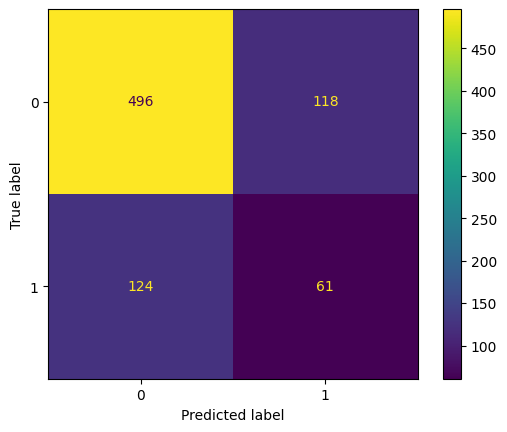

In [7]:
metrics.ConfusionMatrixDisplay.from_estimator(model, x, y)

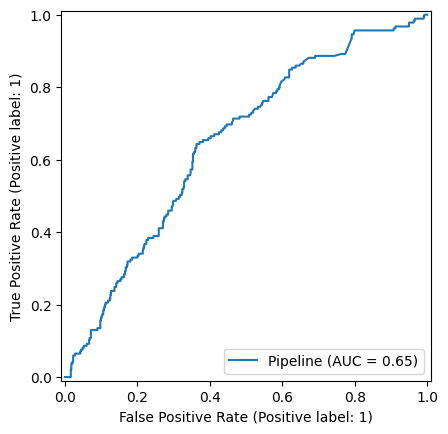

In [9]:
f, ax = plt.subplots()
ax = metrics.RocCurveDisplay.from_estimator(model, x, y, ax=ax)

## Numerical and Categorical features

### Transformer
El poder construir pipeline nos permite fácilmente experimentar muy rápido el efecto de las features que usamos así como las transformaciones que realizamos sobre estas.

In [13]:
CATEGORICAL_COLUMNS = [
    "country_name",
    "device_os",
    "device_lang",
]
NUMERICAL_COLUMNS = [
    "cnt_user_engagement",
    "cnt_level_start_quickplay",
    "cnt_level_end_quickplay",
    "cnt_level_complete_quickplay",
    "cnt_level_reset_quickplay",
    "cnt_post_score",
    "cnt_spend_virtual_currency",
    "cnt_ad_reward",
    "cnt_challenge_a_friend",
    "cnt_completed_5_levels",
    "cnt_use_extra_steps",
]
IGNORE_COLUMNS = [
    "user_first_engagement",
    "user_pseudo_id",
    "is_enable",
    "bounced",
    "device_lang",
]

transformer_numeric = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
        ("scaler", preprocessing.StandardScaler()),
    ]
)
transformer_categorical = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("one-hot", preprocessing.OneHotEncoder(handle_unknown="ignore")),
    ]
)
transformer_pipeline = ColumnTransformer(
    transformers=[
        ("numeric_features", transformer_numeric, NUMERICAL_COLUMNS),
        ("categorical_features", transformer_categorical, CATEGORICAL_COLUMNS),
        ("ignore_features", "drop", IGNORE_COLUMNS),
    ]
)

### Modeling

In [14]:
linear_model_full = Pipeline(
    steps=[
        ("preprocessor", transformer_pipeline),
        ("linear_regressor", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)),
    ]
)
linear_model_full.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('linear_regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_features', ...), ('categorical_features', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Evaluation

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       614
           1       0.32      0.45      0.38       185

    accuracy                           0.65       799
   macro avg       0.57      0.58      0.57       799
weighted avg       0.70      0.65      0.67       799



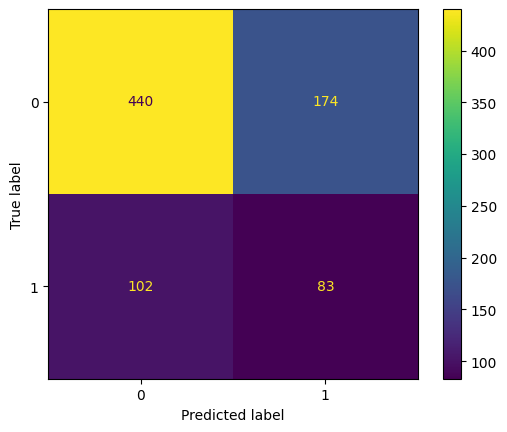

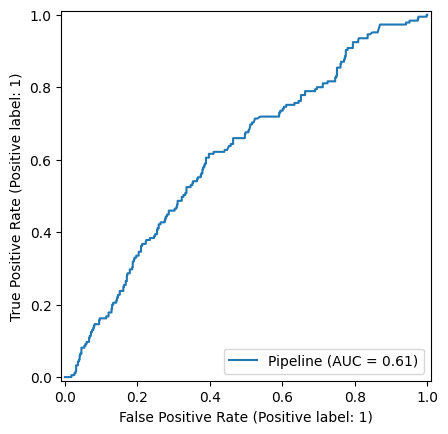

In [17]:
x = x_test
y = y_test
model = linear_model_full

y_pred = model.predict(x)
print(metrics.classification_report(y, y_pred))

metrics.ConfusionMatrixDisplay.from_estimator(model, x, y)

f, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(model, x, y, ax=ax)

## Save model 

In [18]:
model_path = 'models'
if not os.path.exists(model_path):
    os.makedirs(model_path)

joblib.dump(linear_model, f'{model_path}/linear_model.joblib')

['models/linear_model.joblib']